# Voronoi Tuto

Credit source : https://www.youtube.com/watch?v=BUKsBH9oQKg  
Visit his Github : https://github.com/mckayjohns

In [1]:
import pandas as pd
import numpy as np
from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
%matplotlib inline
#import 

In [2]:
barca_x=[93,96,99,102,104,95,86,79,89]
barca_y=[9,22,33,44,56,63,52,33,22]
barca = list(np.zeros((9,),dtype=int))

opp_x=[99,100,102,104,104,102,97,98,94,77]
opp_y=[14,22,33,43,46,55,37,27,21,45]
opp = list(np.ones((10,),dtype=int))

df = pd.DataFrame({
    'x':barca_x+opp_x,
    'y':barca_y+opp_y,
    'team':barca+opp
})

In [3]:
df

,x,y,team
0,93,9,0
1,96,22,0
2,99,33,0
3,102,44,0
4,104,56,0
5,95,63,0
6,86,52,0
7,79,33,0
8,89,22,0
9,99,14,1


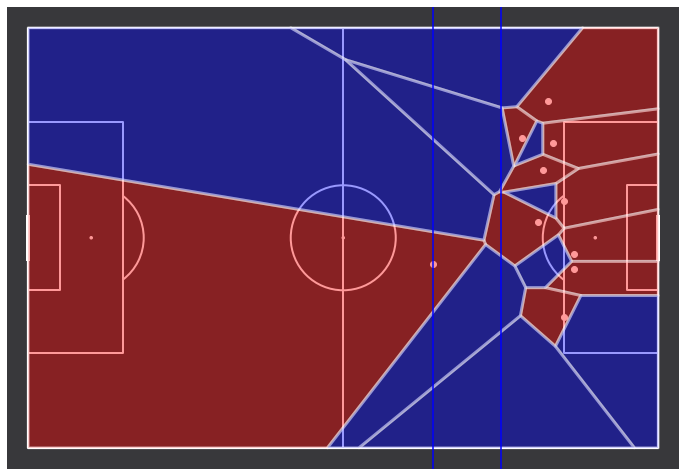

In [4]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True)

pitch.draw(ax=ax)

pitch.scatter(df.loc[df['team'] == 1]['x'],df.loc[df['team'] == 1]['y'], color='white', ax=ax)

plt.axvline(x=77, color='b')
plt.axvline(x=90, color='b')


x= df.x
y= df.y

# using the Voronoi method found in the Pitch library
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=.4)
t1 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)

In [5]:
team1

array([array([[ 93.05223881,  15.03731343],
              [105.58333333,   0.        ],
              [120.        ,   0.        ],
              [120.        ,  15.4375    ],
              [ 98.        ,  18.1875    ],
              [ 96.86842105,  17.76315789]]),
       array([[120.        ,  24.04545455],
              [120.        ,  15.4375    ],
              [ 98.        ,  18.1875    ],
              [ 98.        ,  24.1       ],
              [104.78125   ,  26.8125    ]]),
       array([[100.5       ,  36.25      ],
              [100.5       ,  29.66666667],
              [104.78125   ,  26.8125    ],
              [120.        ,  24.04545455],
              [120.        ,  34.6       ],
              [102.05172414,  38.18965517]]),
       array([[120.        ,  34.6       ],
              [120.        ,  44.5       ],
              [103.5       ,  44.5       ],
              [100.97368421,  39.44736842],
              [102.05172414,  38.18965517]]), array([[103.5 ,  44.5 ],

### Compute voronoi area

In [6]:
#shoelace formula
def polygonArea(X, Y, n):
 
    # Initialize area
    area = 0.0
 
    # Calculate value of shoelace formula
    j = n - 1
    for i in range(0,n):
        area += (X[j] + X[i]) * (Y[j] - Y[i])
        j = i   # j is previous vertex to i
    
 
    # Return absolute value
    return int(abs(area / 2.0))

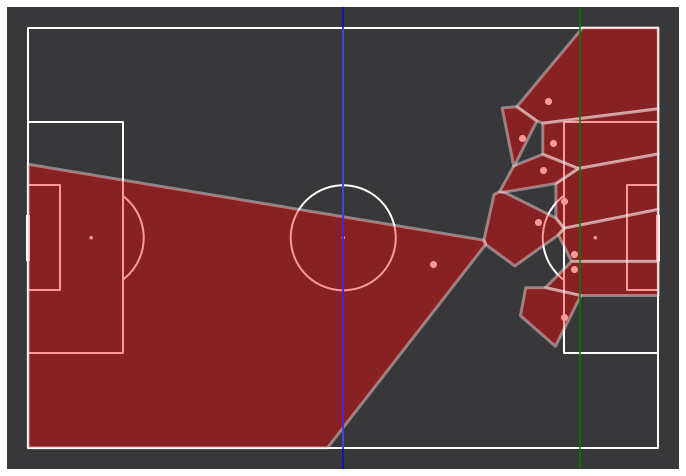

In [7]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True,
              half=False)

pitch.draw(ax=ax)

plt.axvline(x=60, color='b')
plt.axvline(x=105, color='g')

x= df.x
y= df.y

pitch.scatter(df.loc[df['team'] == 1]['x'],df.loc[df['team'] == 1]['y'], color='white', ax=ax)

# using the Voronoi method found in the Pitch library
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=.4)
#t1 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)

In [8]:
team1

array([array([[ 93.05223881,  15.03731343],
              [105.58333333,   0.        ],
              [120.        ,   0.        ],
              [120.        ,  15.4375    ],
              [ 98.        ,  18.1875    ],
              [ 96.86842105,  17.76315789]]),
       array([[120.        ,  24.04545455],
              [120.        ,  15.4375    ],
              [ 98.        ,  18.1875    ],
              [ 98.        ,  24.1       ],
              [104.78125   ,  26.8125    ]]),
       array([[100.5       ,  36.25      ],
              [100.5       ,  29.66666667],
              [104.78125   ,  26.8125    ],
              [120.        ,  24.04545455],
              [120.        ,  34.6       ],
              [102.05172414,  38.18965517]]),
       array([[120.        ,  34.6       ],
              [120.        ,  44.5       ],
              [103.5       ,  44.5       ],
              [100.97368421,  39.44736842],
              [102.05172414,  38.18965517]]), array([[103.5 ,  44.5 ],

In [9]:
team1[0]

array([[ 93.05223881,  15.03731343],
       [105.58333333,   0.        ],
       [120.        ,   0.        ],
       [120.        ,  15.4375    ],
       [ 98.        ,  18.1875    ],
       [ 96.86842105,  17.76315789]])

In [10]:
xs = []
ys = []
for i in team1[0]:
    xs.append(i[0])
    ys.append(i[1])


In [11]:
xs

[93.05223880597015, 105.58333333333333, 120.0, 120.0, 98.0, 96.86842105263158]

In [12]:
ys

[15.03731343283582, 0.0, 0.0, 15.4375, 18.1875, 17.763157894736842]

In [13]:
n = len(xs)

In [14]:
polygonArea(xs, ys,n)

358

In [15]:
def centroid(X,Y,n):
     x = sum(X) / n
     y = sum(Y) / n
     return(x, y)

In [16]:
centroid(xs,ys,n)

(105.5839988653225, 11.070911887928778)

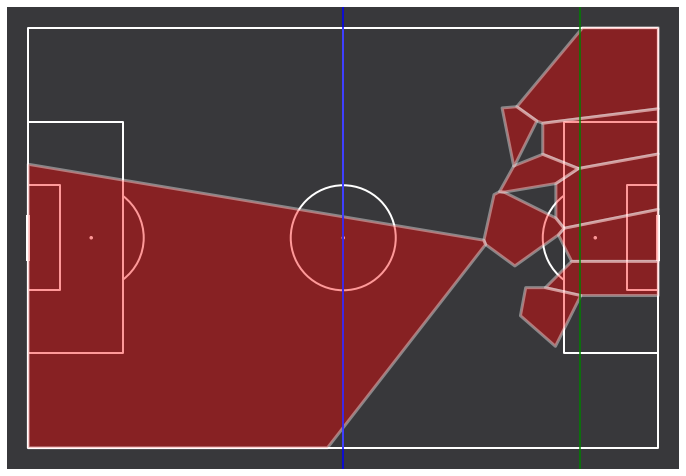

In [17]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True,
              half=False)

pitch.draw(ax=ax)

plt.axvline(x=60, color='b')
plt.axvline(x=105, color='g')

x= df.x
y= df.y

# using the Voronoi method found in the Pitch library
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=.4)
#t1 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)

In [18]:
def centroid_voronoi(team):
    centroids = []
    for c,i in enumerate(team1):
        l_x = []
        l_y = []
        for j in i:
            #print(j)
            l_x.append(j[0])
            l_y.append(j[1])
        print(centroid(l_x,l_y,len(l_x)))
        centroids.append(centroid(l_x,l_y,len(l_x)))
    return centroids

In [19]:
c = centroid_voronoi(team1)

(105.5839988653225, 11.070911887928778)
(108.15625, 21.71659090909091)
(107.97216235632185, 31.594046064089166)
(109.30508166969146, 40.24740471869328)
(109.45, 48.1)
(98.53227312518239, 53.10323898453457)
(93.24566492407553, 37.25858658927736)
(95.53785659000444, 27.96013194751585)
(93.05406929091032, 20.13478086146439)
(46.17978436657681, 53.549460916442044)


In [20]:
dc = pd.DataFrame(c, columns=['x', 'y'])

In [21]:
dc

,x,y
0,105.583999,11.070912
1,108.156250,21.716591
2,107.972162,31.594046
3,109.305082,40.247405
4,109.450000,48.100000
5,98.532273,53.103239
6,93.245665,37.258587
7,95.537857,27.960132
8,93.054069,20.134781
9,46.179784,53.549461


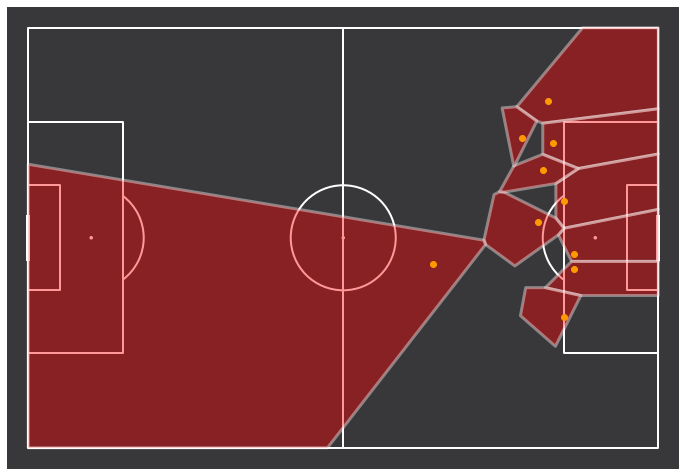

In [43]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True,
              half=False)

pitch.draw(ax=ax)


#pitch.scatter(dc['x'],dc['y'], color='white', ax=ax)
pitch.scatter(df.loc[df['team'] == 1]['x'],df.loc[df['team'] == 1]['y'], color='yellow', ax=ax)



x= df.x
y= df.y

# using the Voronoi method found in the Pitch library
team1, team2 = pitch.voronoi(x,y,df.team)

t1 = pitch.polygon(team1,ax=ax,fc='red',ec='white',lw=3,alpha=.4)
#t1 = pitch.polygon(team2,ax=ax,fc='blue',ec='white',lw=3,alpha=.4)

# -- Test de correspondance Voronoi --

In [23]:
dx = df.loc[df['team'] == 1]
dx

,x,y,team
9,99,14,1
10,100,22,1
11,102,33,1
12,104,43,1
13,104,46,1
14,102,55,1
15,97,37,1
16,98,27,1
17,94,21,1
18,77,45,1


In [24]:
vor_coor = []
for i in team1:
    print(i)
    vor_coor.append(i)

[[ 93.05223881  15.03731343]
 [105.58333333   0.        ]
 [120.           0.        ]
 [120.          15.4375    ]
 [ 98.          18.1875    ]
 [ 96.86842105  17.76315789]]
[[120.          24.04545455]
 [120.          15.4375    ]
 [ 98.          18.1875    ]
 [ 98.          24.1       ]
 [104.78125     26.8125    ]]
[[100.5         36.25      ]
 [100.5         29.66666667]
 [104.78125     26.8125    ]
 [120.          24.04545455]
 [120.          34.6       ]
 [102.05172414  38.18965517]]
[[120.          34.6       ]
 [120.          44.5       ]
 [103.5         44.5       ]
 [100.97368421  39.44736842]
 [102.05172414  38.18965517]]
[[103.5   44.5 ]
 [ 98.5   49.5 ]
 [105.25  51.  ]
 [120.    51.  ]
 [120.    44.5 ]]
[[ 94.75        49.5       ]
 [ 98.5         49.5       ]
 [105.25        51.        ]
 [100.41304348  60.67391304]
 [ 93.74832215  54.84228188]]
[[100.5         36.25      ]
 [102.05172414  38.18965517]
 [100.97368421  39.44736842]
 [ 92.68421053  45.36842105]
 [ 87.1132

In [25]:
len(vor_coor)

10

In [26]:
dx['vor_coor'] = vor_coor

C:\Users\marwane\AppData\Local\Temp\ipykernel_5668\2670762417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx['vor_coor'] = vor_coor


In [27]:
dx.reset_index(inplace=True,drop=True)
dx

,x,y,team,vor_coor
0,99,14,1,"[[93.05223880597015, 15.03731343283582], [105...."
1,100,22,1,"[[120.0, 24.045454545454547], [120.0, 15.4375]..."
2,102,33,1,"[[100.5, 36.25], [100.5, 29.666666666666668], ..."
3,104,43,1,"[[120.0, 34.6], [120.0, 44.5], [103.5, 44.5], ..."
4,104,46,1,"[[103.5, 44.5], [98.5, 49.5], [105.25, 51.0], ..."
5,102,55,1,"[[94.75, 49.5], [98.5, 49.5], [105.25, 51.0], ..."
6,97,37,1,"[[100.5, 36.25], [102.05172413793103, 38.18965..."
7,98,27,1,"[[100.5, 29.666666666666668], [104.78125, 26.8..."
8,94,21,1,"[[92.625, 26.25], [96.86842105263158, 17.76315..."
9,77,45,1,"[[87.11320754716981, 41.283018867924525], [57...."


In [28]:
xs = []
ys = []
for i in dx['vor_coor']:
    for j in i:
        print(j)

[93.05223881 15.03731343]
[105.58333333   0.        ]
[120.   0.]
[120.      15.4375]
[98.     18.1875]
[96.86842105 17.76315789]
[120.          24.04545455]
[120.      15.4375]
[98.     18.1875]
[98.  24.1]
[104.78125  26.8125 ]
[100.5   36.25]
[100.5         29.66666667]
[104.78125  26.8125 ]
[120.          24.04545455]
[120.   34.6]
[102.05172414  38.18965517]
[120.   34.6]
[120.   44.5]
[103.5  44.5]
[100.97368421  39.44736842]
[102.05172414  38.18965517]
[103.5  44.5]
[98.5 49.5]
[105.25  51.  ]
[120.  51.]
[120.   44.5]
[94.75 49.5 ]
[98.5 49.5]
[105.25  51.  ]
[100.41304348  60.67391304]
[93.74832215 54.84228188]
[100.5   36.25]
[102.05172414  38.18965517]
[100.97368421  39.44736842]
[92.68421053 45.36842105]
[87.11320755 41.28301887]
[86.78571429 40.46428571]
[88.71428571 31.78571429]
[89.76315789 31.22631579]
[90.625  31.3125]
[100.5         29.66666667]
[104.78125  26.8125 ]
[98.  24.1]
[92.625 26.25 ]
[92.47058824 26.35294118]
[89.76315789 31.22631579]
[90.625  31.3125]
[92.

In [33]:
xs = []
ys = []
for i in dx['vor_coor'][0]:
    xs.append(i[0])
    xs.append(i[1])

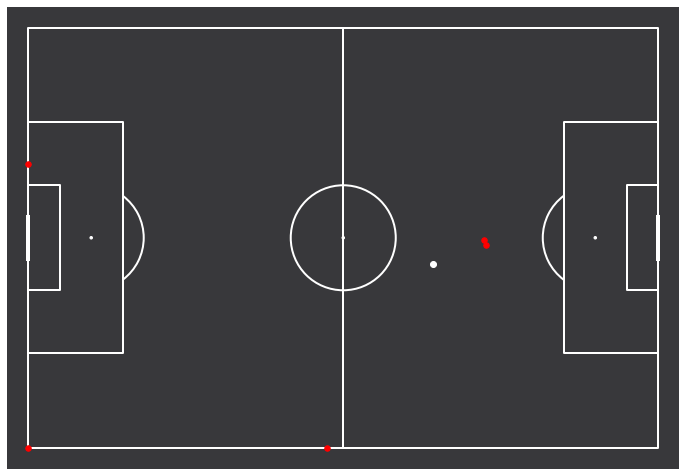

In [60]:
fig,ax = plt.subplots(figsize=(13,8.5))

pitch = Pitch(pitch_type="statsbomb",pitch_color="#38383b",
              line_color="white",constrained_layout=False,tight_layout=True,
              half=False)

pitch.draw(ax=ax)



# plotting the point
c = 9
pitch.scatter(dx['x'][c],dx['y'][c], color='white', ax=ax)
#Plotting the corresponding vertices
xs = []
ys = []
for i in dx['vor_coor'][c]:
    xs.append(i[0])
    ys.append(i[1])

pitch.scatter(xs,ys, color='red', ax=ax,s=30)



In [36]:
xs

[93.05223880597015,
 15.03731343283582,
 105.58333333333333,
 0.0,
 120.0,
 0.0,
 120.0,
 15.4375,
 98.0,
 18.1875,
 96.86842105263158,
 17.763157894736842]

In [37]:
ys

[]